In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.ticker as ticker
os.chdir("")

In [2]:
# import csvs from fiji segmentation grouped by condition/channel/replicate/embryo as 'sample'
file_lists={"mcherry_mch_r3_e1":[i for i in glob.glob('e3/mch_1_int.csv')],
            "mcherry_mch_r3_e2":[i for i in glob.glob('e3/mch_2_int.csv')],
            "mcherry_mch_r3_e3":[i for i in glob.glob('e3/mch_3_int.csv')],
            
            "mcherry+mcitrine_cit_r3_e1":[i for i in glob.glob('e3/mch+mcit_1_cit_int.csv')],
            "mcherry+mcitrine_mch_r3_e1":[i for i in glob.glob('e3/mch+mcit_1_mch_int.csv')],
            "mcherry+mcitrine_cit_r3_e2":[i for i in glob.glob('e3/mch+mcit_2_cit_int.csv')],
            "mcherry+mcitrine_mch_r3_e2":[i for i in glob.glob('e3/mch+mcit_2_mch_int.csv')],
            "mcherry+mcitrine_cit_r3_e3":[i for i in glob.glob('e3/mch+mcit_3_cit_int.csv')],
            "mcherry+mcitrine_mch_r3_e3":[i for i in glob.glob('e3/mch+mcit_3_mch_int.csv')],
            "mcherry+mcitrine_cit_r3_e4":[i for i in glob.glob('e3/mch+mcit_4_cit_int.csv')],
            "mcherry+mcitrine_mch_r3_e4":[i for i in glob.glob('e3/mch+mcit_4_mch_int.csv')],
            
            "mcherry-mcitrine_cit_r3_e1":[i for i in glob.glob('e3/mch-mcit_1_cit_int.csv')],
            "mcherry-mcitrine_mch_r3_e1":[i for i in glob.glob('e3/mch-mcit_1_mch_int.csv')],
            "mcherry-mcitrine_cit_r3_e2":[i for i in glob.glob('e3/mch-mcit_2_cit_int.csv')],
            "mcherry-mcitrine_mch_r3_e2":[i for i in glob.glob('e3/mch-mcit_2_mch_int.csv')],
            "mcherry-mcitrine_cit_r3_e3":[i for i in glob.glob('e3/mch-mcit_3_cit_int.csv')],
            "mcherry-mcitrine_mch_r3_e3":[i for i in glob.glob('e3/mch-mcit_3_mch_int.csv')]}

In [3]:
file_lists

{'mcherry_mch_r3_e1': ['e3/mch_1_int.csv'],
 'mcherry_mch_r3_e2': ['e3/mch_2_int.csv'],
 'mcherry_mch_r3_e3': ['e3/mch_3_int.csv'],
 'mcherry+mcitrine_cit_r3_e1': ['e3/mch+mcit_1_cit_int.csv'],
 'mcherry+mcitrine_mch_r3_e1': ['e3/mch+mcit_1_mch_int.csv'],
 'mcherry+mcitrine_cit_r3_e2': ['e3/mch+mcit_2_cit_int.csv'],
 'mcherry+mcitrine_mch_r3_e2': ['e3/mch+mcit_2_mch_int.csv'],
 'mcherry+mcitrine_cit_r3_e3': ['e3/mch+mcit_3_cit_int.csv'],
 'mcherry+mcitrine_mch_r3_e3': ['e3/mch+mcit_3_mch_int.csv'],
 'mcherry+mcitrine_cit_r3_e4': ['e3/mch+mcit_4_cit_int.csv'],
 'mcherry+mcitrine_mch_r3_e4': ['e3/mch+mcit_4_mch_int.csv'],
 'mcherry-mcitrine_cit_r3_e1': ['e3/mch-mcit_1_cit_int.csv'],
 'mcherry-mcitrine_mch_r3_e1': ['e3/mch-mcit_1_mch_int.csv'],
 'mcherry-mcitrine_cit_r3_e2': ['e3/mch-mcit_2_cit_int.csv'],
 'mcherry-mcitrine_mch_r3_e2': ['e3/mch-mcit_2_mch_int.csv'],
 'mcherry-mcitrine_cit_r3_e3': ['e3/mch-mcit_3_cit_int.csv'],
 'mcherry-mcitrine_mch_r3_e3': ['e3/mch-mcit_3_mch_int.csv']}

In [4]:
# make dataframe with columns for roi(nucleus),type (NA), x/y/z (pixel co-ordinates), value (aat or intensity) filename and sample
data=pd.DataFrame()
for name, items in file_lists.items():
    for csv in items:
        df=pd.read_csv(csv,encoding="utf-8",skiprows=1, usecols=range(2,8),header=None)
        colnames = ["roi", "type", "x", 
                    "y", "z", "value"]
        df.columns=colnames
        df["filename"]=os.path.basename(csv)
        df["sample"]=name
        
        data=data.append(df)

In [5]:
data

,roi,type,x,y,z,value,filename,sample
0,1,0,145.0,174.0,1.0,9.0,mch_1_int.csv,mcherry_mch_r3_e1
1,1,0,146.0,174.0,1.0,14.0,mch_1_int.csv,mcherry_mch_r3_e1
2,1,0,147.0,174.0,1.0,9.0,mch_1_int.csv,mcherry_mch_r3_e1
3,1,0,142.0,175.0,1.0,10.0,mch_1_int.csv,mcherry_mch_r3_e1
4,1,0,143.0,175.0,1.0,12.0,mch_1_int.csv,mcherry_mch_r3_e1
...,...,...,...,...,...,...,...,...
20871,136,0,117.0,168.0,9.0,130.0,mch-mcit_3_mch_int.csv,mcherry-mcitrine_mch_r3_e3
20872,136,0,113.0,169.0,9.0,77.0,mch-mcit_3_mch_int.csv,mcherry-mcitrine_mch_r3_e3
20873,136,0,114.0,169.0,9.0,59.0,mch-mcit_3_mch_int.csv,mcherry-mcitrine_mch_r3_e3
20874,136,0,115.0,169.0,9.0,77.0,mch-mcit_3_mch_int.csv,mcherry-mcitrine_mch_r3_e3


In [6]:
#melt table to get columns for roi, embryo, repeat(replicate), condition, x/y/z (pixel co-ordinates), mcitrine int, mcherry int
data = data.drop(columns = ["type"])

data[["condition","measure","repeat","embryo"]] = data["sample"].str.split('_',expand = True)
dfmelt = pd.pivot(data,columns=["measure"],values=["value"],index=["roi","embryo","repeat","condition","x","y","z"]).reset_index()
dfmelt.columns = dfmelt.columns.droplevel(0)
dfmelt = dfmelt.rename_axis(None,axis=1)
dfmelt.columns = ["roi","embryo","repeat","condition","x","y","z","cit","mch"]

dfmelt

,roi,embryo,repeat,condition,x,y,z,cit,mch
0,1,e1,r3,mcherry,140.0,178.0,1.0,NaN,10.0
1,1,e1,r3,mcherry,140.0,179.0,2.0,NaN,15.0
2,1,e1,r3,mcherry,140.0,180.0,2.0,NaN,6.0
3,1,e1,r3,mcherry,140.0,181.0,2.0,NaN,16.0
4,1,e1,r3,mcherry,141.0,176.0,1.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...
205656,187,e1,r3,mcherry-mcitrine,50.0,182.0,8.0,389.0,100.0
205657,187,e1,r3,mcherry-mcitrine,51.0,178.0,8.0,499.0,92.0
205658,187,e1,r3,mcherry-mcitrine,51.0,180.0,8.0,447.0,88.0
205659,187,e1,r3,mcherry-mcitrine,51.0,181.0,8.0,426.0,73.0


In [7]:
#load wrongly segmented nuclei from excel list

notdata = pd.read_csv("e3_rem_obj.csv")
notdata["embryo"]="e"+notdata["embryo"].astype(str)
notdata["repeat"]="r"+notdata["repeat"].astype(str)

notdata

,condition,repeat,embryo,roi
0,mch,r3,e1,44
1,mch,r3,e1,45
2,mch,r3,e1,47
3,mch,r3,e1,49
4,mch,r3,e1,3
...,...,...,...,...
199,mch+mcit,r3,e4,147
200,mch+mcit,r3,e4,144
201,mch+mcit,r3,e4,148
202,mch+mcit,r3,e4,150


In [8]:
#remove wrongly segmented nuclei from dataframe

dfsorted=pd.merge(dfmelt,notdata,how="left",indicator=True)
dfsorted = dfsorted.loc[dfsorted["_merge"]!="both"]
dfsorted = dfsorted.drop(columns = "_merge")

dfsorted

,roi,embryo,repeat,condition,x,y,z,cit,mch
0,1,e1,r3,mcherry,140.0,178.0,1.0,NaN,10.0
1,1,e1,r3,mcherry,140.0,179.0,2.0,NaN,15.0
2,1,e1,r3,mcherry,140.0,180.0,2.0,NaN,6.0
3,1,e1,r3,mcherry,140.0,181.0,2.0,NaN,16.0
4,1,e1,r3,mcherry,141.0,176.0,1.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...
205656,187,e1,r3,mcherry-mcitrine,50.0,182.0,8.0,389.0,100.0
205657,187,e1,r3,mcherry-mcitrine,51.0,178.0,8.0,499.0,92.0
205658,187,e1,r3,mcherry-mcitrine,51.0,180.0,8.0,447.0,88.0
205659,187,e1,r3,mcherry-mcitrine,51.0,181.0,8.0,426.0,73.0


In [9]:
# calculate mean intensity of each nucleus 

dfsorted["roi"]=dfsorted["roi"].astype(str)
dfsorted["nucleus_id"]=dfsorted["condition"]+"_"+dfsorted["embryo"]+"_"+dfsorted["roi"]

dfsorted["mean_cit_intensity_per_nucleus"]=dfsorted.groupby(["nucleus_id"])["cit"].transform("mean")
dfsorted["mean_mch_intensity_per_nucleus"]=dfsorted.groupby(["nucleus_id"])["mch"].transform("mean")

In [10]:
# clean dataframe - drop duplicates
dfint = dfsorted[["condition","nucleus_id","mean_cit_intensity_per_nucleus","embryo","mean_mch_intensity_per_nucleus"]].drop_duplicates("nucleus_id")
dfint["sample"]=dfint["condition"]+"_"+dfint["embryo"]
dfint.to_csv("e3_non-binned_ints.csv")
dfint

,condition,nucleus_id,mean_cit_intensity_per_nucleus,embryo,mean_mch_intensity_per_nucleus,sample
0,mcherry,mcherry_e1_1,NaN,e1,13.144737,mcherry_e1
228,mcherry+mcitrine,mcherry+mcitrine_e1_1,87.297735,e1,11.055016,mcherry+mcitrine_e1
537,mcherry-mcitrine,mcherry-mcitrine_e1_1,1418.017123,e1,256.938356,mcherry-mcitrine_e1
829,mcherry,mcherry_e2_1,NaN,e2,7.824561,mcherry_e2
1000,mcherry+mcitrine,mcherry+mcitrine_e2_1,970.285156,e2,120.343750,mcherry+mcitrine_e2
...,...,...,...,...,...,...
205183,mcherry-mcitrine,mcherry-mcitrine_e2_184,574.625000,e2,118.412500,mcherry-mcitrine_e2
205263,mcherry-mcitrine,mcherry-mcitrine_e1_185,883.326923,e1,164.528846,mcherry-mcitrine_e1
205367,mcherry-mcitrine,mcherry-mcitrine_e2_185,446.189474,e2,93.557895,mcherry-mcitrine_e2
205462,mcherry-mcitrine,mcherry-mcitrine_e1_186,659.202020,e1,125.050505,mcherry-mcitrine_e1


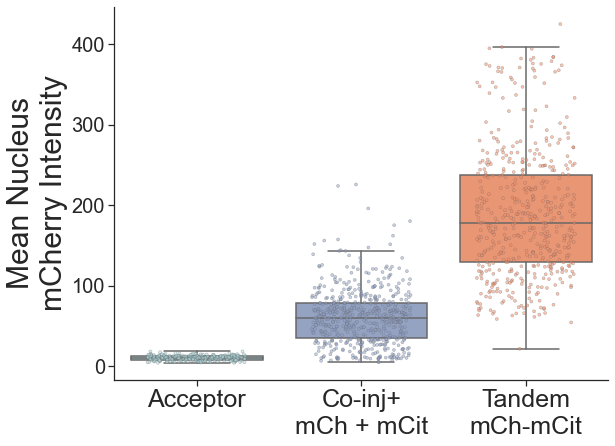

In [11]:
# plot mean mcherry intensity of individual nuclei across conditions

#make palette
palette = {"mcherry-mcitrine":"#fc8d62",
           "mcherry+mcitrine":"#8da0cb",
           "mcherry":"powderblue"}

#font for graph
sns.set(font="Arial",style="ticks")

#order of conditions to plot
order =["mcherry","mcherry+mcitrine","mcherry-mcitrine"]

#bar and scatterplots
ax=sns.catplot(data=dfint,x="condition",y="mean_mch_intensity_per_nucleus", order=order, kind="box", showfliers=False, legend=False, height = 6, aspect = 1.3, palette=palette)
ax=sns.stripplot(data=dfint,x="condition",y="mean_mch_intensity_per_nucleus", order=order, marker="o", alpha=0.5, jitter = 0.3, dodge = True , size = 3, linewidth=0.5, palette=palette)

#set x and y axis labels
ax.set_ylabel("Mean Nucleus\nmCherry Intensity",fontsize=30)
ax.set_xlabel("")

#set y axis tick intervals and font size
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.yticks(fontsize=20)

# set x axis tick labels
ax.set_xticklabels(["Acceptor", "Co-inj+\nmCh + mCit","Tandem\nmCh-mCit"], fontsize = 25)

#save plot

plt.savefig("e3_SE_mean_mch_int_515nm.png",dpi=300, bbox_inches='tight')

In [12]:
dfint.loc[(dfint["condition"]=="mcherry")]["mean_mch_intensity_per_nucleus"].median()

10.269520851818989

In [13]:
dfint.loc[(dfint["condition"]=="mcherry+mcitrine")]["mean_mch_intensity_per_nucleus"].median()

59.60495623875649

In [14]:
dfint.loc[(dfint["condition"]=="mcherry-mcitrine")]["mean_mch_intensity_per_nucleus"].median()

178.43432141819238